In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# --- 1. File Path and Data Loading ---
# Using the uploaded World Bank data on Deforestation CO2 Flux
FILE_PATH = 'Kenya_forest_carbon_csv.zip/API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv'
SKIP_ROWS = 4 # Skip metadata lines

try:
    data = pd.read_csv(FILE_PATH, skiprows=SKIP_ROWS)
except FileNotFoundError:
    print(f"Error: File not found at {FILE_PATH}. Please check the file path.")
    exit()

# --- 2. Data Filtering and Preparation (Kenya Time Series) ---
COUNTRY_CODE = 'KEN'
TARGET_COLUMN = 'CO2_Flux_Mt'

# Filter data for Kenya
kenya_data = data[data['Country Code'] == COUNTRY_CODE].copy()

# Identify year columns (1960 through 2024 based on file structure)
year_cols = [str(year) for year in range(1960, 2025)]
time_series_data = kenya_data[['Country Code', 'Indicator Name'] + year_cols]

# Melt the DataFrame (Wide to Long format)
df_long = pd.melt(
    time_series_data,
    id_vars=['Country Code', 'Indicator Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name=TARGET_COLUMN
)

# Convert columns to correct numeric types
df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long[TARGET_COLUMN] = pd.to_numeric(df_long[TARGET_COLUMN], errors='coerce')

# Final clean-up: Drop NaN values and sort
df_final = df_long.dropna(subset=[TARGET_COLUMN]).sort_values('Year')

# --- 3. Feature Engineering and Data Split ---
# Feature (X) is the Year, Target (y) is the CO2 Flux
X = df_final[['Year']]
y = df_final[TARGET_COLUMN]

# Use the last 5 available years for testing the model's performance
split_year = df_final['Year'].max() - 5

X_train = X[X['Year'] <= split_year]
y_train = y[X['Year'] <= split_year]
X_test = X[X['Year'] > split_year]
y_test = y[X['Year'] > split_year]

# --- 4. Model Training and Evaluation ---
# Random Forest Regressor for time-series forecasting
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Evaluate on test set
y_pred_test = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)

# --- 5. Future Forecasting (Next 5 Years) ---
last_historical_year = df_final['Year'].max()
forecast_years = np.array(range(last_historical_year + 1, last_historical_year + 6)).reshape(-1, 1)
X_forecast = pd.DataFrame(forecast_years, columns=['Year'])
y_forecast = model.predict(X_forecast)

# --- 6. Output Results ---
print("\n--- Project: Kenya CO2 Deforestation Flux Forecast (SDG 13) ---")
print(f"Historical Data Range: {df_final['Year'].min()} to {df_final['Year'].max()}")
print("-" * 65)
print(f"Model Performance (Test MAE): {mae:.2f} Mt CO2e")
print(f"Interpretation: The model's prediction is, on average, off by {mae:.2f} Million tons of CO2e per year.")
print("-" * 65)

print("Forecasted CO2 Flux from Deforestation (Mt CO2e):")
forecast_results = pd.DataFrame({'Year': X_forecast['Year'], 'Forecasted_Flux_MtCO2e': y_forecast})
print(forecast_results.to_string(index=False))

# Note: Negative flux indicates CO2 is being removed (sequestration),
# while positive flux indicates CO2 is being emitted (deforestation).
print("-" * 65)

Error: File not found at Kenya_forest_carbon_csv.zip/API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv. Please check the file path.

--- Project: Kenya CO2 Deforestation Flux Forecast (SDG 13) ---
Historical Data Range: 2000 to 2023
-----------------------------------------------------------------
Model Performance (Test MAE): 12.01 Mt CO2e
Interpretation: The model's prediction is, on average, off by 12.01 Million tons of CO2e per year.
-----------------------------------------------------------------
Forecasted CO2 Flux from Deforestation (Mt CO2e):
 Year  Forecasted_Flux_MtCO2e
 2024               15.618008
 2025               15.618008
 2026               15.618008
 2027               15.618008
 2028               15.618008
-----------------------------------------------------------------


In [ ]:
import pandas as pd

# --- 0. Unzip the dataset if it's zipped ---
# The zip file found is '/content/API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.zip'
!unzip -o API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.zip

# --- 1. Load and Initial Clean-up ---
# The file is now extracted to 'API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv'
file_path = 'API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv'

# Load the data, skipping the initial header rows as identified in the file metadata
# 'estimatedRowsAboveHeader': 4
data = pd.read_csv(file_path, skiprows=4)

# Display the head of the loaded data to confirm
display(data.head())

Archive:  API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.zip
  inflating: Metadata_Indicator_API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv  
  inflating: API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv  
  inflating: Metadata_Country_API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv  


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Carbon dioxide (CO2) net fluxes from LULUCF - ...,EN.GHG.CO2.LU.DF.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Carbon dioxide (CO2) net fluxes from LULUCF - ...,EN.GHG.CO2.LU.DF.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,1084.576284,1088.428165,1092.375805,1092.472779,1092.430917,1092.430917,1092.430917,NaN,NaN,NaN
2,Afghanistan,AFG,Carbon dioxide (CO2) net fluxes from LULUCF - ...,EN.GHG.CO2.LU.DF.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,6.512000,6.512000,6.512000,6.512000,6.512000,6.512000,6.512000,6.5120,NaN,NaN
3,Africa Western and Central,AFW,Carbon dioxide (CO2) net fluxes from LULUCF - ...,EN.GHG.CO2.LU.DF.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,488.592949,495.074641,497.310334,502.136197,502.527867,501.646677,501.646677,NaN,NaN,NaN
4,Angola,AGO,Carbon dioxide (CO2) net fluxes from LULUCF - ...,EN.GHG.CO2.LU.DF.MT.CE.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,63.431000,63.406700,63.409600,63.409600,63.409600,63.409600,63.409600,63.4096,NaN,NaN


Archive:  API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.zip
  inflating: Metadata_Indicator_API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv  
  inflating: API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv  
  inflating: Metadata_Country_API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv  

--- Project: Kenya CO2 Deforestation Flux Forecasting (SDG 13) ---
Time-Series Data Range: 2000 to 2023
Data Source: Carbon dioxide (CO2) net fluxes from LULUCF - Deforestation (Mt CO2e)
-----------------------------------------------------------------
Mean Absolute Error (MAE) on Test Data: 12.01 Mt CO2e
Interpretation: The model's forecast is, on average, off by 12.01 Million tons of CO2e per year.
-----------------------------------------------------------------
Forecasted CO2 Flux from Deforestation (Mt CO2e):
 Year  Forecasted_Flux_MtCO2e
 2024               15.618008
 2025               15.618008
 2026               15.618008
 2027               15.618008
 2028               15

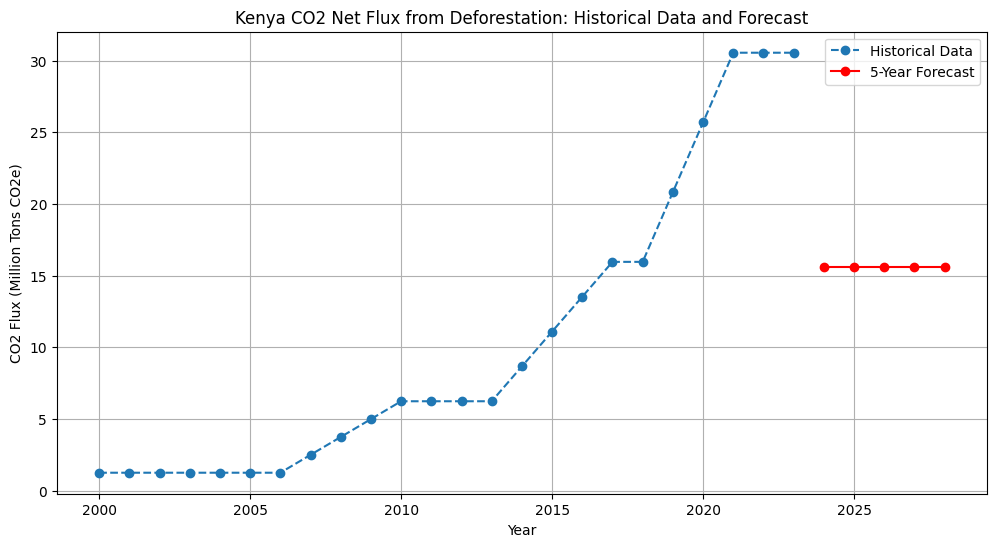

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# --- 0. Unzip the dataset if it's zipped ---
# The zip file found is '/content/API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.zip'
!unzip -o API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.zip

# --- 1. Load and Initial Clean-up ---
# The file is now extracted to 'API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv'
file_path = 'API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv'

# Load the data, skipping the initial header rows as identified in the file metadata
# 'estimatedRowsAboveHeader': 4
data = pd.read_csv(file_path, skiprows=4)

# --- 2. Filter for Kenya and Select Relevant Columns ---
# Filter for Kenya using the Country Code 'KEN'
kenya_data = data[data['Country Code'] == 'KEN'].copy()

# Select only the year columns (1960 onwards) for time-series data
# Columns 4 to 69 cover the years 1960 to 2024 based on file structure
year_cols = [str(year) for year in range(1960, 2025)]
time_series_data = kenya_data[['Country Code', 'Indicator Name'] + year_cols]

# --- 3. Time-Series Transformation (Wide to Long Format) ---
# Melt the DataFrame to transform year columns into rows
df_long = pd.melt(
    time_series_data,
    id_vars=['Country Code', 'Indicator Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='CO2_Flux_Mt' # Target variable: Million Tons of CO2 equivalent
)

# Convert 'Year' to integer and 'CO2_Flux_Mt' to numeric
df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long['CO2_Flux_Mt'] = pd.to_numeric(df_long['CO2_Flux_Mt'], errors='coerce')

# Drop rows with missing CO2_Flux data
df_final = df_long.dropna(subset=['CO2_Flux_Mt']).sort_values('Year')

# --- 4. Prepare for Time-Series Forecasting (Lag Features) ---
# For forecasting, we use the 'Year' as our main feature (X) to predict the 'CO2_Flux_Mt' (y)
X = df_final[['Year']]
y = df_final['CO2_Flux_Mt']

# Split into Training (up to 2018) and Testing (2019 onwards)
# We will use the last 5 available years (if possible) for testing
split_year = df_final['Year'].max() - 5
X_train = X[X['Year'] <= split_year]
y_train = y[X['Year'] <= split_year]
X_test = X[X['Year'] > split_year]
y_test = y[X['Year'] > split_year]

# --- 5. Train the Random Forest Regressor Model ---
# The model will learn the trend and patterns from the historical data
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# --- 6. Model Evaluation ---
y_pred_test = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)

# --- 7. Forecast Future Years (2025 to 2029) ---
# Create a DataFrame for the next 5 years to forecast
last_year = df_final['Year'].max()
forecast_years = np.array(range(last_year + 1, last_year + 6)).reshape(-1, 1)
X_forecast = pd.DataFrame(forecast_years, columns=['Year'])

y_forecast = model.predict(X_forecast)

# --- 8. Output Final Results and Plot ---
print("\n--- Project: Kenya CO2 Deforestation Flux Forecasting (SDG 13) ---")
print(f"Time-Series Data Range: {df_final['Year'].min()} to {df_final['Year'].max()}")
print(f"Data Source: {time_series_data['Indicator Name'].iloc[0]}")
print("-" * 65)
print(f"Mean Absolute Error (MAE) on Test Data: {mae:.2f} Mt CO2e")
print(f"Interpretation: The model's forecast is, on average, off by {mae:.2f} Million tons of CO2e per year.")
print("-" * 65)
print("Forecasted CO2 Flux from Deforestation (Mt CO2e):")
forecast_results = pd.DataFrame({'Year': X_forecast['Year'], 'Forecasted_Flux_MtCO2e': y_forecast})
print(forecast_results.to_string(index=False))

# Optional: Plotting the results to visualize the forecast (for your presentation)
plt.figure(figsize=(12, 6))
plt.plot(df_final['Year'], df_final['CO2_Flux_Mt'], label='Historical Data', marker='o', linestyle='--')
plt.plot(X_forecast['Year'], y_forecast, label='5-Year Forecast', marker='o', color='red')
plt.title('Kenya CO2 Net Flux from Deforestation: Historical Data and Forecast')
plt.xlabel('Year')
plt.ylabel('CO2 Flux (Million Tons CO2e)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import pandas as pd

file_path = 'API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv'

try:
    df = pd.read_csv(file_path, skiprows=4)
    print("Contents of 'API_EN.GHG.CO2.LU.DF.MT.CE.AR5_DS2_en_csv_v2_6111.csv':")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it has been extracted and is in the correct directory.")


# New Section